In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# Optional: Set a style for the plots to make them look nicer
#plt.style.use('seaborn-darkgrid')


In [59]:
# Load the three CSV files (update paths with the actual ones)
psnr_file_path = '/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/psnr_wandb_export_2024-09-24T17_06_56.092+08_00.csv'
ssim_file_path = '/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/ssim_wandb_export_2024-09-25T09_04_32.083+08_00.csv'
lpips_file_path = '/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/lpips_wandb_export_2024-09-25T09_04_21.435+08_00.csv'

# Load each CSV file into a separate DataFrame
psnr_data = pd.read_csv(psnr_file_path)
ssim_data = pd.read_csv(ssim_file_path)
lpips_data = pd.read_csv(lpips_file_path)


# savepath
save_path = '/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/'

# Display the first few rows of each dataset to understand the structure
# print("PSNR Data:", psnr_data.head())
# print("SSIM Data:", ssim_data.head())
# print("LPIPS Data:", lpips_data.head())

# Now you can proceed with processing each dataset and plotting them

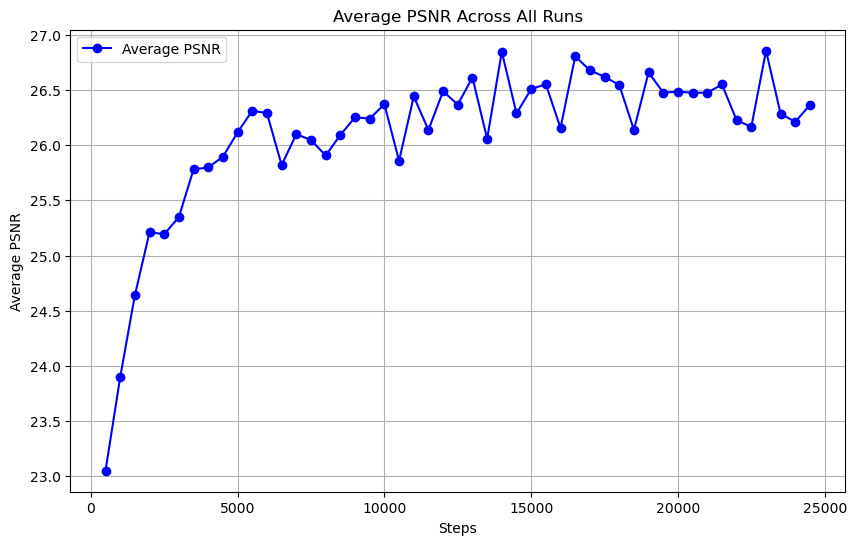

In [60]:
# Extract the 'Step' column and PSNR columns
psnr_columns = [col for col in data.columns if 'psnr' in col and 'Step' not in col]

# Calculate the mean PSNR values across all runs for each step
data['Average PSNR'] = data[psnr_columns].mean(axis=1)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Step'], data['Average PSNR'], label='Average PSNR', color='b', marker='o')

# Adding labels and title
plt.xlabel('Steps')
plt.ylabel('Average PSNR')
plt.title('Average PSNR Across All Runs')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

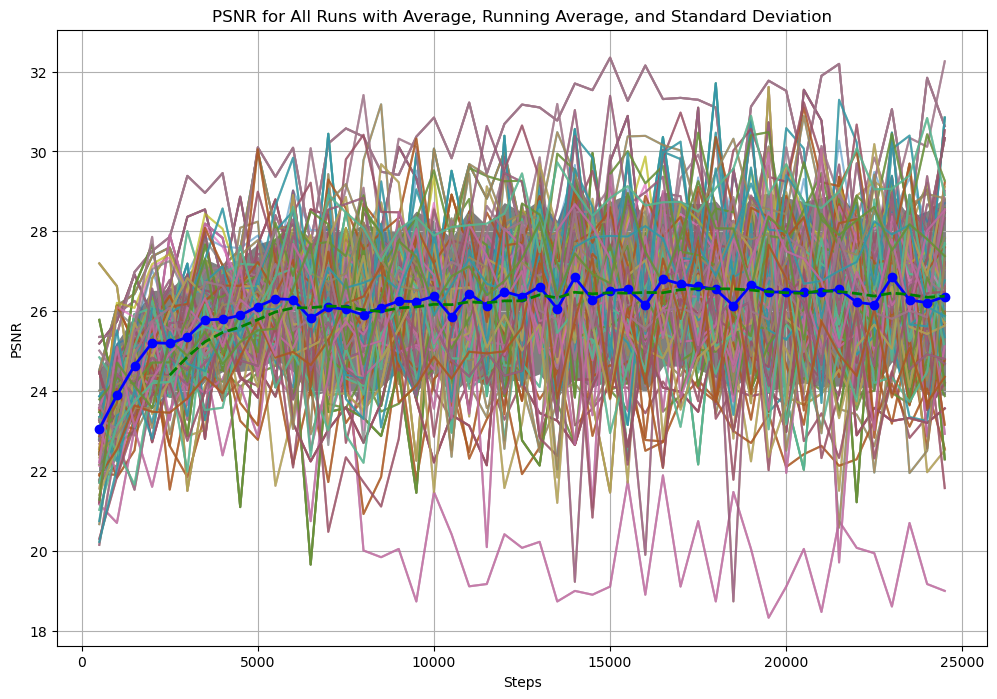

In [61]:
# Extract the 'Step' column and PSNR columns
psnr_columns = [col for col in data.columns if 'psnr' in col and 'Step' not in col]

# Calculate the mean PSNR values across all runs for each step
data['Average PSNR'] = data[psnr_columns].mean(axis=1)

# Calculate the running average (rolling mean) and standard deviation for PSNR
window_size = 5  # You can adjust this for a larger or smaller window
data['PSNR Running Average'] = data['Average PSNR'].rolling(window=window_size).mean()
data['PSNR Std Dev'] = data[psnr_columns].std(axis=1)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot all individual runs
for column in psnr_columns:
    plt.plot(data['Step'], data[column], label=f'{column}', alpha=0.5)

# Plot Average PSNR
plt.plot(data['Step'], data['Average PSNR'], label='Average PSNR', color='b', marker='o', linewidth=2)

# Plot Running Average
plt.plot(data['Step'], data['PSNR Running Average'], label='Running Average (Window=5)', color='g', linestyle='--', linewidth=2)

# Plot standard deviation as a shaded area
plt.fill_between(data['Step'], 
                 data['Average PSNR'] - data['PSNR Std Dev'], 
                 data['Average PSNR'] + data['PSNR Std Dev'], 
                 color='gray', alpha=1.0, label='Standard Deviation')

# Adding labels, legend, and title
plt.xlabel('Steps')
plt.ylabel('PSNR')
plt.title('PSNR for All Runs with Average, Running Average, and Standard Deviation')
plt.grid(True)
# plt.legend(loc='best', ncol=2)

# Display the plot
plt.show()

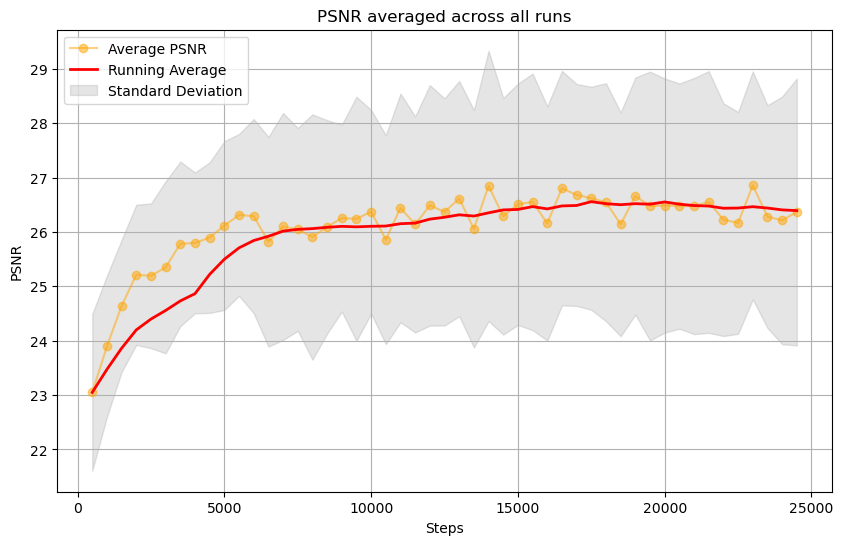

In [62]:
# PSNR Calculations and Plot

# Check if the PSNR columns exist
psnr_columns = [col for col in psnr_data.columns if 'psnr' in col and 'Step' not in col]

# Calculate the mean PSNR values across all runs for each step
psnr_data['Average PSNR'] = psnr_data[psnr_columns].mean(axis=1)

# Calculate the running average (rolling mean) and standard deviation for PSNR
window_size = 8  # You can adjust this for a larger or smaller window
psnr_data['PSNR Running Average'] = psnr_data['Average PSNR'].rolling(window=window_size, min_periods=1).mean()
psnr_data['PSNR Std Dev'] = psnr_data[psnr_columns].std(axis=1)

# Plot the data with the running average and standard deviation for PSNR
plt.figure(figsize=(10, 6))

# Plot Average PSNR
plt.plot(psnr_data['Step'], psnr_data['Average PSNR'], label='Average PSNR', color='orange', marker='o', alpha=0.5)

# Plot Running Average with a continuous red line and increased line width
plt.plot(psnr_data['Step'], psnr_data['PSNR Running Average'], label='Running Average', color='red', linestyle='-', linewidth=2)

# Plot standard deviation as a shaded area
plt.fill_between(psnr_data['Step'], 
                 psnr_data['Average PSNR'] - psnr_data['PSNR Std Dev'], 
                 psnr_data['Average PSNR'] + psnr_data['PSNR Std Dev'], 
                 color='gray', alpha=0.2, label='Standard Deviation')

# Adding labels and title
plt.xlabel('Steps')
plt.ylabel('PSNR')
plt.title('PSNR averaged across all runs')
plt.grid(True)
plt.legend()

# Save the PSNR plot
plt.savefig(os.path.join(save_path, 'psnr_plot.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


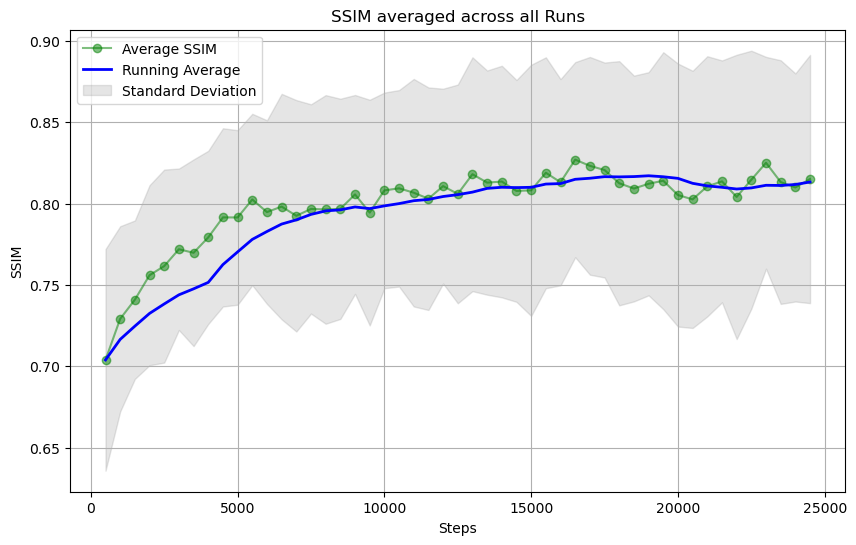

In [63]:
# SSIM Calculations and Plot

# Check if the SSIM columns exist
ssim_columns = [col for col in ssim_data.columns if 'ssim' in col and 'Step' not in col]

# Calculate the mean SSIM values across all runs for each step
ssim_data['Average SSIM'] = ssim_data[ssim_columns].mean(axis=1)

# Calculate the running average (rolling mean) and standard deviation for SSIM
window_size = 8  # You can adjust this for a larger or smaller window
ssim_data['SSIM Running Average'] = ssim_data['Average SSIM'].rolling(window=window_size, min_periods=1).mean()
ssim_data['SSIM Std Dev'] = ssim_data[ssim_columns].std(axis=1)

# Plot the data with the running average and standard deviation for SSIM
plt.figure(figsize=(10, 6))

# Plot Average SSIM
plt.plot(ssim_data['Step'], ssim_data['Average SSIM'], label='Average SSIM', color='g', marker='o', alpha=0.5)

# Plot Running Average with a continuous red line and increased line width
plt.plot(ssim_data['Step'], ssim_data['SSIM Running Average'], label='Running Average', color='blue', linestyle='-', linewidth=2)

# Plot standard deviation as a shaded area
plt.fill_between(ssim_data['Step'], 
                 ssim_data['Average SSIM'] - ssim_data['SSIM Std Dev'], 
                 ssim_data['Average SSIM'] + ssim_data['SSIM Std Dev'], 
                 color='gray', alpha=0.2, label='Standard Deviation')

# Adding labels and title
plt.xlabel('Steps')
plt.ylabel('SSIM')
plt.title('SSIM averaged across all Runs')
plt.grid(True)
plt.legend()

# Save the PSNR plot
plt.savefig(os.path.join(save_path, 'ssim_plot.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


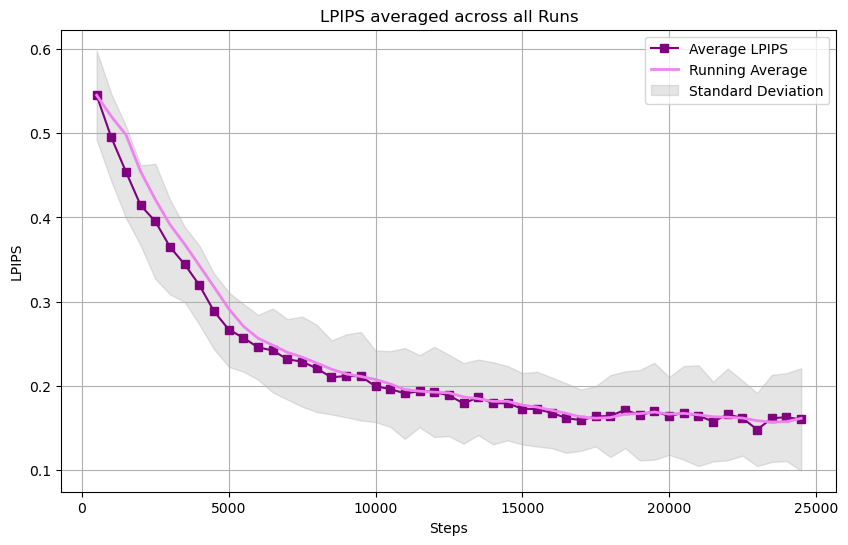

In [66]:
# LPIPS Calculations and Plot

# Check if the LPIPS columns exist
lpips_columns = [col for col in lpips_data.columns if 'lpips' in col and 'Step' not in col]

# Calculate the mean LPIPS values across all runs for each step
lpips_data['Average LPIPS'] = lpips_data[lpips_columns].mean(axis=1)

# Calculate the running average (rolling mean) and standard deviation for LPIPS
window_size = 3  # You can adjust this for a larger or smaller window
lpips_data['LPIPS Running Average'] = lpips_data['Average LPIPS'].rolling(window=window_size, min_periods=1).mean()
lpips_data['LPIPS Std Dev'] = lpips_data[lpips_columns].std(axis=1)

# Plot the data with the running average and standard deviation for LPIPS
plt.figure(figsize=(10, 6))

# Plot Average LPIPS
plt.plot(lpips_data['Step'], lpips_data['Average LPIPS'], label='Average LPIPS', color='purple', marker='s')

# Plot Running Average with a continuous red line and increased line width
plt.plot(lpips_data['Step'], lpips_data['LPIPS Running Average'], label='Running Average', color='violet', linestyle='-', linewidth=2)

# Plot standard deviation as a shaded area
plt.fill_between(lpips_data['Step'], 
                 lpips_data['Average LPIPS'] - lpips_data['LPIPS Std Dev'], 
                 lpips_data['Average LPIPS'] + lpips_data['LPIPS Std Dev'], 
                 color='grey', alpha=0.2, label='Standard Deviation')

# Adding labels and title
plt.xlabel('Steps')
plt.ylabel('LPIPS')
plt.title('LPIPS averaged across all Runs')
plt.grid(True)
plt.legend()

# Save the PSNR plot
plt.savefig(os.path.join(save_path, 'lpips_plot.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


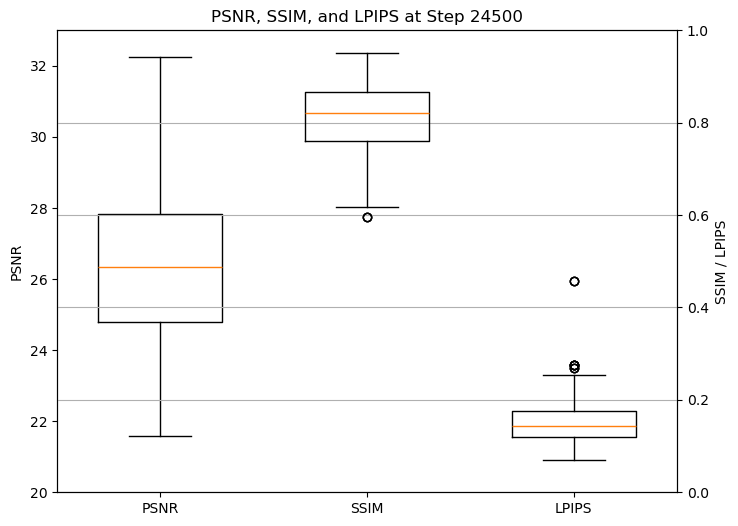

In [65]:
# Boxplot data extraction
psnr_values = psnr_data[psnr_data['Step'] == 24500][psnr_columns].values.flatten()
ssim_values = ssim_data[ssim_data['Step'] == 24500][ssim_columns].values.flatten()
lpips_values = lpips_data[lpips_data['Step'] == 24500][lpips_columns].values.flatten()

# Create a boxplot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Boxplot for PSNR on the left y-axis
ax1.boxplot([psnr_values], positions=[1], widths=0.6)
ax1.set_ylabel('PSNR')
ax1.set_ylim([20, 33])  # Adjust PSNR scale

# Create second y-axis for SSIM and LPIPS
ax2 = ax1.twinx()
ax2.boxplot([ssim_values, lpips_values], positions=[2, 3], widths=0.6)
ax2.set_ylabel('SSIM / LPIPS')
ax2.set_ylim([0, 1])  # Adjust SSIM/LPIPS scale

# Set x-ticks and labels
plt.xticks([1, 2, 3], ['PSNR', 'SSIM', 'LPIPS'])

# Title and grid
plt.title('PSNR, SSIM, and LPIPS at Step 24500')
plt.grid(True)

# Save the PSNR plot
plt.savefig(os.path.join(save_path, 'boxplot_24500_plot.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
